In [143]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, PowerTransformer
from sklearn.pipeline import Pipeline

In [144]:
# obtengo datos
df = pd.read_csv("Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv", encoding="ISO-8859-1")

In [145]:
# Visualizamos primeras 10 filas
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [146]:
df.shape

(4141, 55)

In [147]:
#Obtenemos las tendencias de todas las columnas.
df.describe(include="all")

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
count,3493,3493,3493,3493,3493,3492,3479,3493,3479,3493.000000,...,2226,3493,3493,3493,3493,3493,3493,3493,3493,3493
unique,3493,3481,13,32,755,521,1067,23,27,NaN,...,96,3,3,3,3,3,3,3,2,3
top,DLAGU8,ANTES DE LA CONFLUENCIA CON EL RIO ATOYAC,LERMA SANTIAGO PACIFICO,VERACRUZ DE IGNACIO DE LA LLAVE,ACAPULCO DE JUAREZ,YUCATAN (RESTO DE RH 32),OCEANO PACIFICO,LOTICO,RIO,NaN,...,"CF,E_COLI,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO
freq,1,3,709,326,60,101,139,1263,1478,NaN,...,439,2319,1650,3104,1634,1453,2589,2958,3411,1772
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.359969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.122773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-117.124030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-103.882310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.795530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.860230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
#Obtenemos información de valores nulos y tipo de datos.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [149]:
#Obtenemos cantidad de nulos

df.isnull().sum()

CLAVE                      648
SITIO                      648
ORGANISMO_DE_CUENCA        648
ESTADO                     648
MUNICIPIO                  648
CUENCA                     649
CUERPO DE AGUA             662
TIPO                       648
SUBTIPO                    662
LONGITUD                   648
LATITUD                    648
PERIODO                    648
DBO_mg/L                  1560
CALIDAD_DBO               1560
DQO_mg/L                  1560
CALIDAD_DQO               1560
SST_mg/L                   652
CALIDAD_SST                652
COLI_FEC_NMP_100mL        1559
CALIDAD_COLI_FEC          1559
E_COLI_NMP_100mL          1559
CALIDAD_E_COLI            1559
ENTEROC_NMP_100mL         3237
CALIDAD_ENTEROC           3237
OD_PORC                   2344
CALIDAD_OD_PORC           2344
OD_PORC_SUP               2522
CALIDAD_OD_PORC_SUP       2522
OD_PORC_MED               3654
CALIDAD_OD_PORC_MED       3654
OD_PORC_FON               3195
CALIDAD_OD_PORC_FON       3195
TOX_D_48

In [150]:
# Tamaño de los datos
df.shape

(4141, 55)

In [151]:
# Conteo de los valores diferentes de las columnas
df.nunique()

CLAVE                     3493
SITIO                     3481
ORGANISMO_DE_CUENCA         13
ESTADO                      32
MUNICIPIO                  755
CUENCA                     521
CUERPO DE AGUA            1067
TIPO                        23
SUBTIPO                     27
LONGITUD                  3486
LATITUD                   3485
PERIODO                      1
DBO_mg/L                   743
CALIDAD_DBO                  5
DQO_mg/L                  1211
CALIDAD_DQO                  5
SST_mg/L                  1219
CALIDAD_SST                  5
COLI_FEC_NMP_100mL         408
CALIDAD_COLI_FEC             5
E_COLI_NMP_100mL           372
CALIDAD_E_COLI               5
ENTEROC_NMP_100mL          185
CALIDAD_ENTEROC              4
OD_PORC                    837
CALIDAD_OD_PORC              5
OD_PORC_SUP                771
CALIDAD_OD_PORC_SUP          5
OD_PORC_MED                359
CALIDAD_OD_PORC_MED          5
OD_PORC_FON                556
CALIDAD_OD_PORC_FON          5
TOX_D_48

In [152]:
#Clasificamos de los datos
Drop = ["CLAVE", "SITIO","ORGANISMO_DE_CUENCA","ESTADO", "MUNICIPIO","CUENCA", "CUERPO DE AGUA","TIPO","SUBTIPO", "PERIODO", "CALIDAD_TOX_D_48_FON", "TOX_D_48_FON_UT", "TOX_FIS_FON_15_UT", "CALIDAD_TOX_FIS_FON_15", "CONTAMINANTES"]
Ordinales = ["CALIDAD_DBO", "CALIDAD_DQO", "CALIDAD_SST", "CALIDAD_COLI_FEC", "CALIDAD_E_COLI",  "CALIDAD_ENTEROC", "CALIDAD_OD_PORC", "CALIDAD_OD_PORC_SUP", "CALIDAD_OD_PORC_MED", "CALIDAD_OD_PORC_FON", "CALIDAD_TOX_D_48", "CALIDAD_TOX_V_15", "CALIDAD TOX_D_48_SUP", "CALIDAD_TOX_FIS_SUP_15"]
Binarias = ["CUMPLE_CON_DBO", "CUMPLE_CON_DQO", "CUMPLE_CON_SST", "CUMPLE_CON_CF", "CUMPLE_CON_E_COLI", "CUMPLE_CON_ENTEROC", "CUMPLE_CON_OD", "CUMPLE_CON_TOX"]
Numericas = ["DBO_mg/L", "DQO_mg/L", "SST_mg/L", "COLI_FEC_NMP_100mL", "E_COLI_NMP_100mL", "OD_PORC", "OD_PORC_SUP", "OD_PORC_MED", "OD_PORC_FON", "TOX_D_48_UT", "TOX_V_15_UT", "TOX_D_48_SUP_UT", "TOX_FIS_SUP_15_UT","ENTEROC_NMP_100mL"]
Geoespaciales = ["LONGITUD", "LATITUD"]
#Y = ["SEMAFORO"]

In [153]:
#Eliminacion de columnas que no nos interesan
df.drop(columns=Drop, inplace=True)
df.shape


(4141, 40)

In [154]:
# Se eliminan datos de lugares los cuales no son relevantes para el analisis requerido

In [155]:
for i in Ordinales:
    print(df[i].unique())
    

['Buena calidad' nan 'Excelente' 'Aceptable' 'Contaminada'
 'Fuertemente contaminada']
['Contaminada' nan 'Excelente' 'Aceptable' 'Buena calidad'
 'Fuertemente contaminada']
['Excelente' 'Buena calidad' 'Contaminada' 'Aceptable' nan
 'Fuertemente contaminada']
['Contaminada' nan 'Buena calidad' 'Fuertemente contaminada' 'Excelente'
 'Aceptable']
['Excelente' nan 'Buena calidad' 'Fuertemente contaminada' 'Contaminada'
 'Aceptable']
[nan 'Excelente' 'Contaminada' 'Fuertemente contaminada' 'Buena calidad']
[nan 'Excelente' 'Contaminada' 'Fuertemente contaminada' 'Aceptable'
 'Buena calidad']
['Aceptable' 'Excelente' nan 'Buena calidad' 'Contaminada'
 'Fuertemente contaminada']
[nan 'Excelente' 'Buena calidad' 'Contaminada' 'Aceptable'
 'Fuertemente contaminada']
[nan 'Excelente' 'Contaminada' 'Buena calidad' 'Aceptable'
 'Fuertemente contaminada']
[nan 'No Toxico' 'Toxicidad moderada' 'Toxicidad baja' 'Toxicidad alta']
[nan 'No Toxico' 'Toxicidad moderada' 'Toxicidad alta' 'Toxicidad baja

In [156]:
#Reemplazamos con valores numericos los renglones

for i in Ordinales:
    print(df[i].isnull().sum())


1560
1560
652
1559
1559
3237
2344
2522
3654
3195
2325
2322
3379
2467


In [157]:
for i in Ordinales:
    df[i].fillna(df[i].mode(), inplace=True)

In [158]:
# Reemplazamos los renglones con valores numericos

for i in Ordinales:
    if i in ["CALIDAD_TOX_D_48", "CALIDAD_TOX_V_15", "CALIDAD TOX_D_48_SUP", "CALIDAD_TOX_FIS_SUP_15"]:
        df[i] = df[i].apply(lambda x: 1 if x== "No Toxico" else (2 if x=="Toxicidad baja" else (3 if x=="Toxicidad moderada" else (4 if x== "Toxicidad alta" else 0)) ))
    else:
        df[i] = df[i].apply(lambda x: 1 if x=="Excelente" else (2 if x=="Buena calidad" else (3 if x=="Aceptable" else (4 if x=="Contaminada" else (5 if x=="Fuertemente contaminada" else 0)))))


In [159]:
df["CALIDAD_TOX_D_48"].head()

0    1
1    0
2    0
3    0
4    0
Name: CALIDAD_TOX_D_48, dtype: int64

In [160]:
for i in Binarias:
    print(df[i].unique())

['SI' 'ND' 'NO' nan]
['NO' 'ND' 'SI' nan]
['SI' 'NO' 'ND' nan]
['NO' 'ND' 'SI' nan]
['SI' 'ND' 'NO' nan]
['ND' 'SI' 'NO' nan]
['SI' 'NO' 'ND' nan]
['SI' 'NO' nan]


In [161]:
#for i in Binarias:
    #if i in ["CUMPLE_CON_DBO", "CUMPLE_CON_DQO", "CUMPLE_CON_SST", "CUMPLE_CON_CF", "CUMPLE_CON_E_COLI", "CUMPLE_CON_ENTEROC", "CUMPLE_CON_OD", "CUMPLE_CON_TOX"]:
        #df[i] = df[i].apply(lambda x: 1 if x== "SI" else( 0 if x=="NO" else 2))

In [162]:
for i in Binarias:
    df[i] = df[i].replace("SI", 1)
    df[i] = df[i].replace("NO", 0)
    df[i] = df[i].replace("ND", np.nan)
    

In [163]:
for i in Binarias:
    print(df[i].unique())

[ 1. nan  0.]
[ 0. nan  1.]
[ 1.  0. nan]
[ 0. nan  1.]
[ 1. nan  0.]
[nan  1.  0.]
[ 1.  0. nan]
[ 1.  0. nan]


In [164]:
for i in Numericas:
    df[i] = df[i].replace("<1", 0)
    df[i] = df[i].replace("<2", 1)
    df[i] = df[i].replace("<3", 2)
    df[i] = df[i].replace("<10", 9)
    df[i] = df[i].astype(float)
    
    

In [165]:
df["SEMAFORO"] = df["SEMAFORO"].apply(lambda x: 3 if x == 'Rojo' else (2 if x == 'Amarillo' else (1 if x == 'Verde' else x)))

In [166]:
#Datos faltantes en datos geoespaciales
df[Geoespaciales].isna().sum()

LONGITUD    648
LATITUD     648
dtype: int64

In [167]:
#Asignación de valores que no son nulos en la variable SEMAFORO
df = df.dropna(axis=0, subset=['SEMAFORO'])

In [168]:
#Datos faltantes en datos geoespaciales
df[Geoespaciales].isna().sum()

LONGITUD    0
LATITUD     0
dtype: int64

In [169]:
# Llenamos los huecos con la moda
#df[Y].fillna(df[Y].mode(), inplace=True)

In [170]:
#df[Y] = df[Y].apply(lambda x: 1 if x =='Rojo' else (2 if x == 'Amarillo' else 3) )
#df[Y] = df[Y].astype(int)

In [171]:
#df[Y].unique()

In [172]:
for i in Binarias:
    print(df[i].unique())

[ 1. nan  0.]
[ 0. nan  1.]
[ 1.  0. nan]
[ 0. nan  1.]
[ 1. nan  0.]
[nan  1.  0.]
[ 1.  0. nan]
[1. 0.]


In [173]:
for i in Numericas:
    print(df[i].unique())

[6.0000e+00        nan 1.0000e+00 4.2600e+00 6.4000e+00 4.9800e+00
 5.4600e+00 7.1000e+00 4.6600e+00 5.3000e+00 5.7300e+00 7.6800e+00
 8.0600e+00 1.1060e+01 1.8860e+01 3.3420e+01 2.7420e+01 3.0660e+01
 9.6600e+00 4.7400e+00 4.7700e+00 3.6300e+00 5.1000e+00 8.4900e+00
 4.3200e+00 1.0140e+01 1.2210e+01 4.1400e+00 5.5200e+00 3.2700e+00
 1.1850e+01 4.9600e+01 6.4200e+00 4.2900e+01 1.2775e+02 9.2000e+00
 3.5500e+01 4.4400e+00 2.0900e+01 5.0400e+00 5.5600e+00 1.0700e+01
 5.1400e+00 2.0500e+01 8.0000e+00 7.9400e+00 4.5100e+01 3.4950e+01
 7.5800e+00 7.9200e+00 8.9000e+00 5.8400e+00 7.0800e+00 1.0100e+01
 5.9000e+00 1.2800e+01 1.3200e+01 9.8000e+00 6.1400e+00 9.8600e+00
 8.2000e+00 1.9500e+01 6.4800e+00 8.7600e+00 2.2200e+01 4.2800e+00
 2.3400e+00 4.3800e+00 1.0300e+01 7.8200e+00 4.3000e+00 4.5400e+00
 1.0200e+01 6.7600e+00 3.7200e+01 4.0200e+00 4.0600e+00 4.5200e+00
 5.4400e+00 7.7000e+00 5.0200e+00 2.4610e+01 4.5300e+01 4.2300e+01
 2.7900e+01 5.4020e+01 4.2010e+01 5.9270e+01 7.5310e+01 4.5600

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LONGITUD                3493 non-null   float64
 1   LATITUD                 3493 non-null   float64
 2   DBO_mg/L                2581 non-null   float64
 3   CALIDAD_DBO             3493 non-null   int64  
 4   DQO_mg/L                2581 non-null   float64
 5   CALIDAD_DQO             3493 non-null   int64  
 6   SST_mg/L                3489 non-null   float64
 7   CALIDAD_SST             3493 non-null   int64  
 8   COLI_FEC_NMP_100mL      2582 non-null   float64
 9   CALIDAD_COLI_FEC        3493 non-null   int64  
 10  E_COLI_NMP_100mL        2582 non-null   float64
 11  CALIDAD_E_COLI          3493 non-null   int64  
 12  ENTEROC_NMP_100mL       904 non-null    float64
 13  CALIDAD_ENTEROC         3493 non-null   int64  
 14  OD_PORC                 1797 non-null   

In [175]:
df["CUMPLE_CON_DBO"].unique()

array([ 1., nan,  0.])

In [176]:
df.head()

,LONGITUD,LATITUD,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,...,SEMAFORO,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,-102.33911,22.24730,6.0,2,54.08,4,13.7500,1,1162.0,4,...,3.0,1.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,LENTICO
1,-109.84290,22.90473,NaN,0,NaN,0,9.0000,1,NaN,0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,COSTERO
2,-109.86442,22.89880,NaN,0,NaN,0,9.0000,1,NaN,0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,COSTERO
3,-109.88604,22.89609,NaN,0,NaN,0,13.9667,1,NaN,0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,COSTERO
4,-109.89657,22.87694,NaN,0,NaN,0,9.0000,1,NaN,0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,COSTERO


In [177]:
# Separamos datos para validacion y prueba

#Determinamos las columnas que tenga el eje x
X = df[Ordinales + Binarias + Numericas + Geoespaciales]

#Determinamos las columnas que contendrá el eje y
y = df["SEMAFORO"].copy()

#creamos nuestros datos de validación con la función trains_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=0)

print("Tamaño del conjunto de dato x_train: ", X_train.shape)
print("Tamaño del conjunto de dato X_test: ", X_test.shape)

X_train.head()



Tamaño del conjunto de dato x_train:  (2794, 38)
Tamaño del conjunto de dato X_test:  (699, 38)


,CALIDAD_DBO,CALIDAD_DQO,CALIDAD_SST,CALIDAD_COLI_FEC,CALIDAD_E_COLI,CALIDAD_ENTEROC,CALIDAD_OD_PORC,CALIDAD_OD_PORC_SUP,CALIDAD_OD_PORC_MED,CALIDAD_OD_PORC_FON,...,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT,ENTEROC_NMP_100mL,LONGITUD,LATITUD
1264,3,4,1,3,2,0,0,3,3,4,...,32.0,31.5,29.1,NaN,NaN,0.0,0.0,NaN,-98.75572,20.16694
1533,2,3,1,1,1,0,3,0,0,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,-92.67170,18.25030
2457,1,3,2,1,1,0,3,0,0,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,-98.45665,21.77064
2635,1,3,4,5,5,0,2,0,0,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,-104.59277,19.18618
1362,3,4,1,2,1,0,2,0,0,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,-88.47892,18.49348


In [178]:
#Función que muestra la impresión de diagrama de caja de los datos numéricos
def box(df_data, col_name):
    sns.set(rc={'figure.figsize':(20, 20)})
    len_col = len(col_name)
    for k in range(0, len_col):
      plt.subplot(int(len_col/2), 4, k + 1)
      X_tcopy = df_data[col_name[k]].copy()
      X_tcopy.fillna(X_tcopy.median(), inplace=True)
      plt.boxplot(X_tcopy)
      plt.xlabel(col_name[k])
    plt.show()

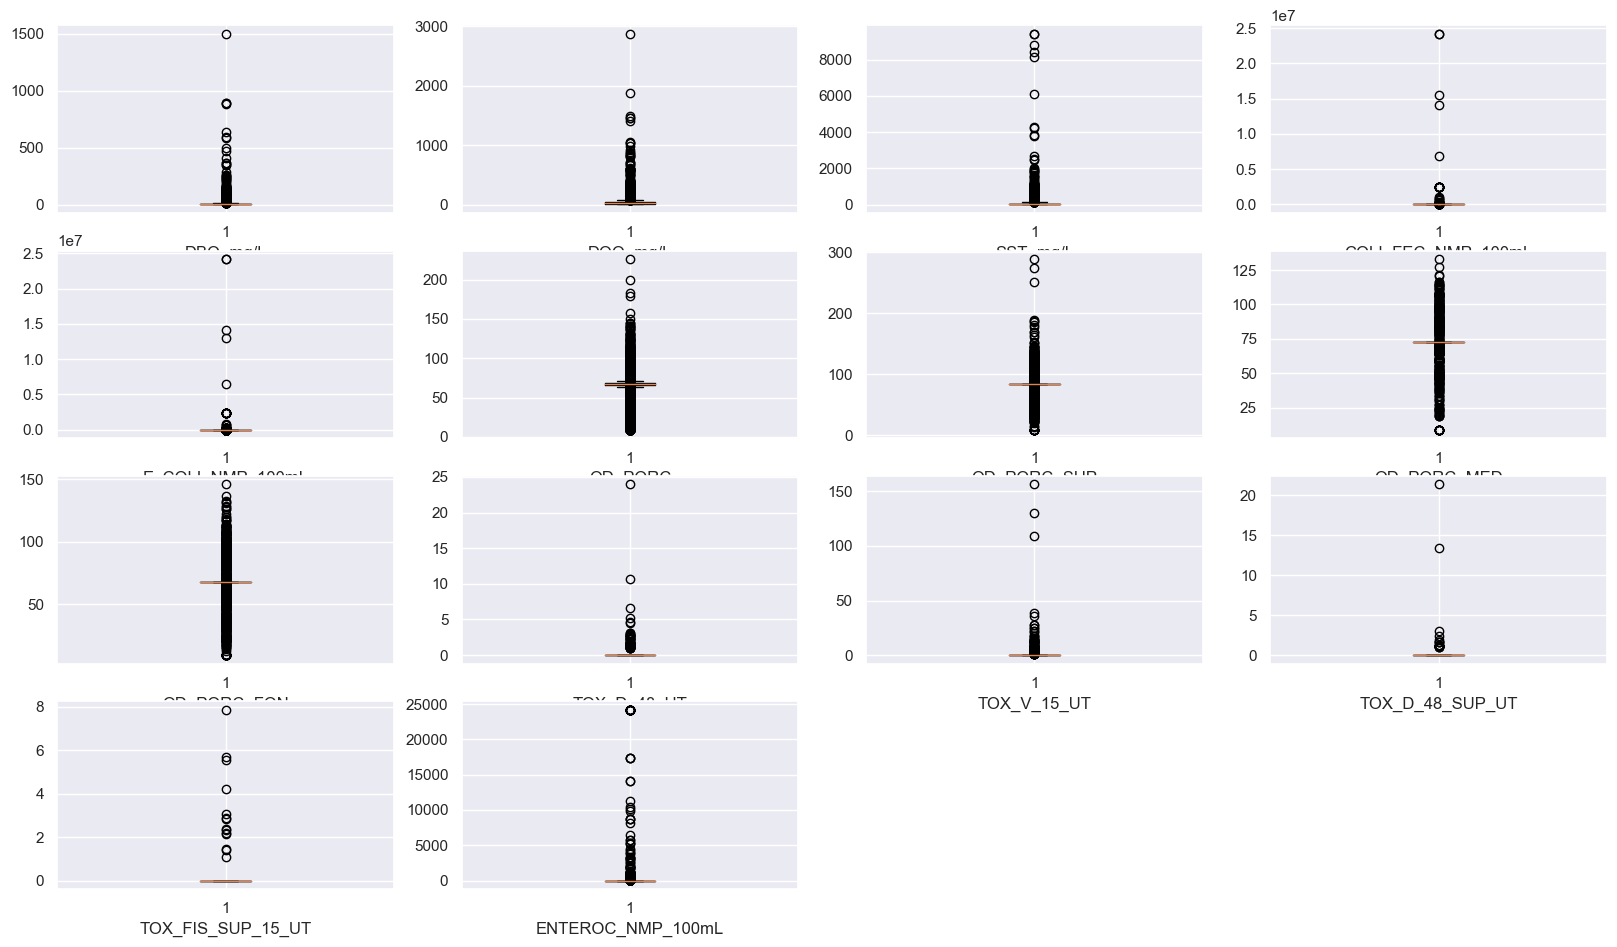

In [179]:
box(X_train, Numericas)

In [180]:
# Realizamos el analisis de la relacion entre la calidad del agua y su ubicacion geografica

In [181]:
pipeline_binarios = Pipeline(steps=[
    ('input', SimpleImputer(strategy='most_frequent')),
])


pipeline_numericas = Pipeline(steps=[
    ('input', SimpleImputer(strategy='median')),
    ("escalaNum", MinMaxScaler())
])
    
    
pipeline_geoespaciales = Pipeline(steps=[
    ('input', SimpleImputer(strategy='most_frequent'))
    
])


pipeline_ordinales = Pipeline(steps=[
    ('input', SimpleImputer(strategy='most_frequent')),
    ("escalaNum", MinMaxScaler())
])



estrategias = [
    ('bin', pipeline_binarios, Binarias),
    ('num', pipeline_numericas, Numericas),
    ('geo',pipeline_geoespaciales,Geoespaciales),
    ("ord", pipeline_ordinales, Ordinales)
]

pipeline_def = ColumnTransformer(transformers=estrategias, remainder='passthrough')

In [182]:
df.to_csv (r'export_dataframe limpia.csv', index = True, header=True)

In [183]:



Xtr = pipeline_def.fit_transform(X_train)
ytr = np.ravel(y_train)


Xtest = pipeline_def.fit_transform(X_test)
ytest = np.ravel(y_test)


In [184]:
# Modelo kmeans
# Definimos las variables 

#Geoespaciales


In [185]:
XGeo = df[Geoespaciales]

In [186]:
from sklearn.cluster import KMeans

In [187]:
Clusters = 6

kmeans = KMeans(n_clusters=Clusters).fit(XGeo)

centers = kmeans.cluster_centers_

In [188]:
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import ConvexHull

clusters = pd.DataFrame()                                         
clusters["Coordinates"] = list(zip(centers[:,0], centers[:,1]))   
clusters["Coordinates"] = clusters["Coordinates"].apply(Point)  

#Convertimos el DF en uno geoespacial para las graficas
clusters = gpd.GeoDataFrame(clusters, geometry="Coordinates")

In [189]:
geo = pd.DataFrame()
geo["Coordinates"] = list(zip(XGeo.LONGITUD, XGeo.LATITUD))
geo["Coordinates"] = geo["Coordinates"].apply(Point)

#Convertimos el DataFrame a Geoespacial
geo = gpd.GeoDataFrame(geo, geometry="Coordinates")

#Agregamos la clasificación del semáforo
geo["Class"]= df[['SEMAFORO']]

In [190]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.loc[world['continent'] == "North America"]
world.loc[world['name'] == "Mexico"]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
27,127575529.0,North America,Mexico,MEX,1268870,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."


C:\Users\oviwa\AppData\Local\Temp\ipykernel_43616\582931086.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borders["clasi"] = Clase


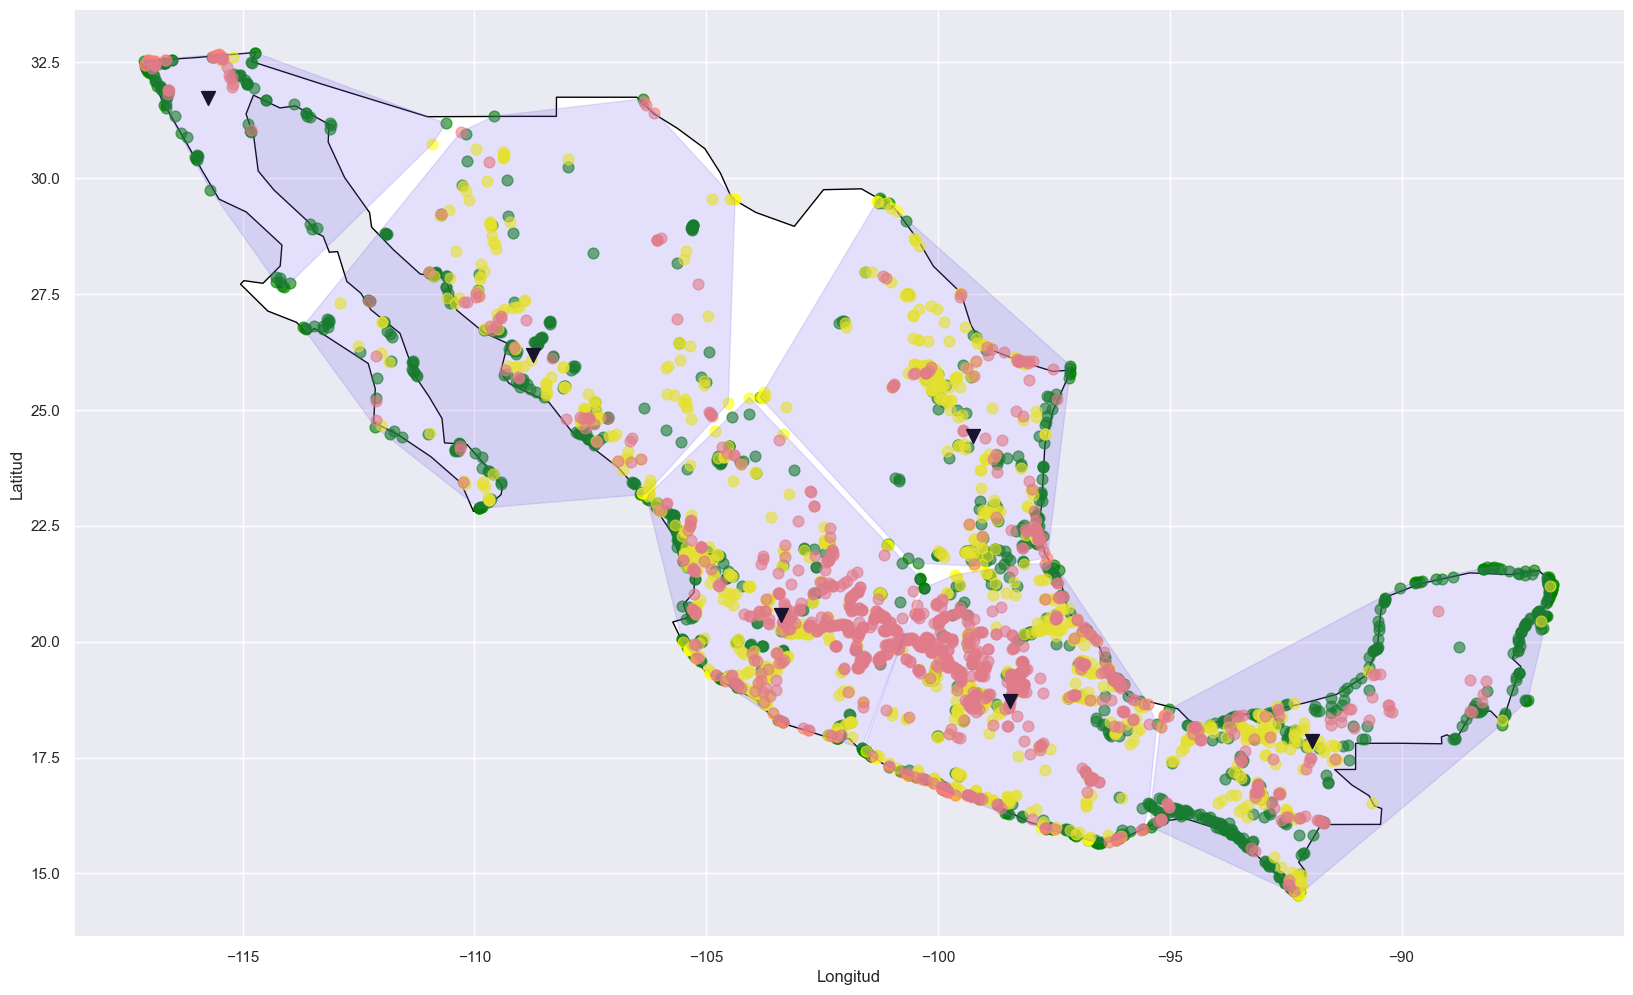

In [191]:
fig, gax = plt.subplots(figsize=(20,20))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')


geo.loc[geo['Class'] == 1].plot(ax=gax, color='#008000', alpha = 0.6, markersize=60) #Verde
geo.loc[geo['Class'] == 2].plot(ax=gax, color='#FFFF00', alpha = 0.6, markersize=60)#Amarillo
geo.loc[geo['Class'] == 3].plot(ax=gax, color='#FA8072', alpha = 0.6, markersize=60)#Rojo

clusters.plot(ax=gax, color='black', alpha = 1, marker="v", markersize=100)

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)


Clase = kmeans.labels_


borders = XGeo
borders["clasi"] = Clase
borders.head()

for i in borders.clasi.unique():
    points = borders[borders.clasi == i][['LONGITUD', 'LATITUD']].values
    hull = ConvexHull(points)

    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])

    plt.fill(x_hull, y_hull, alpha=0.2, c='mediumslateblue')